In [912]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy.stats import zscore

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [913]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("heart.csv")  

In [914]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,MaxHr,exang,oldpeak,slope,ca,thal,AHD,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,3,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,3,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,3,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,2,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,2,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,1,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,3,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,3,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,2,reversable defect,1


In [915]:
df.shape

(920, 17)

In [916]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   MaxHr     865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      920 non-null    int64  
 15  AHD       434 non-null    object 
 16  num       920 non-null    int64  
dtypes: float64(5), int64(4), object(8)
memory usage: 122.3+ KB


In [917]:
df.drop('id',axis=1,inplace=True)

In [918]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
MaxHr        55
exang        55
oldpeak      62
slope       309
ca          611
thal          0
AHD         486
num           0
dtype: int64

In [919]:
df.rename(columns={'MaxHr ': 'MaxHr'}, inplace=True)

In [920]:
df['heart_rate_category'] = df['MaxHr'].apply(lambda x: 'High' if x > 100 else 'Normal')
df['Chol_category'] = df['chol'].apply(lambda x: 'High' if x > 200 else 'Normal')

####  we have create heart rate and cholestrol normal range category to classify patients based on normal and high range of heart rate and cholestrol.

In [921]:
df.head(5)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,MaxHr,exang,oldpeak,slope,ca,thal,AHD,num,heart_rate_category,Chol_category
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,3,fixed defect,0,High,High
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,3,normal,2,High,High
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,3,reversable defect,1,High,High
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,3,normal,0,High,High
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,2,normal,0,High,High


In [922]:
#filling na values in numericals columns with respective medians

med1= df['trestbps'].median()
df['trestbps']=df['trestbps'].replace(np.nan,med1)
med2=df['chol'].median()
df['chol']=df['chol'].replace(np.nan,med2)
med3= df['MaxHr'].median()
df['MaxHr']=df['MaxHr'].replace(np.nan,med3)
med2=df['oldpeak'].median()
df['oldpeak']=df['oldpeak'].replace(np.nan,med2)
med2=df['ca'].median()
df['ca']=df['ca'].replace(np.nan,med2)

In [923]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [924]:
df.dropna(subset=['AHD'], inplace=True)

In [925]:
df.isnull().sum()

age                     0
sex                     0
dataset                 0
cp                      0
trestbps                0
chol                    0
fbs                    28
restecg                 0
MaxHr                   0
exang                   2
oldpeak                 0
slope                  49
ca                      0
thal                    0
AHD                     0
num                     0
heart_rate_category     0
Chol_category           0
dtype: int64

In [926]:
#for categorical vars creating unknown category for na values
df['fbs'] = df['fbs'].fillna('Unknown')
df['exang'] = df['exang'].fillna('Unknown')
df['slope'] = df['slope'].fillna('Unknown')

In [927]:
df.shape

(434, 18)

In [928]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'serum_cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiographic_results', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'duration_of_exercise'}, 
    errors="raise")

In [929]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 917
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   434 non-null    int64  
 1   sex                                   434 non-null    object 
 2   dataset                               434 non-null    object 
 3   chest_pain_type                       434 non-null    object 
 4   resting_blood_pressure                434 non-null    float64
 5   serum_cholesterol                     434 non-null    float64
 6   fasting_blood_sugar                   434 non-null    object 
 7   resting_electrocardiographic_results  434 non-null    object 
 8   MaxHr                                 434 non-null    float64
 9   exercise_induced_angina               434 non-null    object 
 10  st_depression                         434 non-null    float64
 11  st_slope           

In [930]:
# checking value counts of each categorical var
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts(normalize=True))
        print('\n')

sex
Male      0.74424
Female    0.25576
Name: sex, dtype: float64


dataset
Cleveland        0.693548
Switzerland      0.163594
VA Long Beach    0.078341
Hungary          0.064516
Name: dataset, dtype: float64


chest_pain_type
asymptomatic       0.550691
non-anginal        0.258065
atypical angina    0.131336
typical angina     0.059908
Name: chest_pain_type, dtype: float64


fasting_blood_sugar
False      0.781106
True       0.154378
Unknown    0.064516
Name: fasting_blood_sugar, dtype: float64


resting_electrocardiographic_results
normal              0.543779
lv hypertrophy      0.366359
st-t abnormality    0.089862
Name: resting_electrocardiographic_results, dtype: float64


exercise_induced_angina
False      0.605991
True       0.389401
Unknown    0.004608
Name: exercise_induced_angina, dtype: float64


st_slope
flat           0.472350
upsloping      0.352535
Unknown        0.112903
downsloping    0.062212
Name: st_slope, dtype: float64


AHD
normal               0.451613
reversa

## encoding

In [931]:
df['sex'] = df['sex'].replace({'Male':0,'Female':1})
df['sex'].value_counts()

0    323
1    111
Name: sex, dtype: int64

In [932]:
df['dataset'] = df['dataset'].replace({'Cleveland':0,'Switzerland':1,'VA Long Beach':2,'Hungary':3})
df['dataset'].value_counts()

0    301
1     71
2     34
3     28
Name: dataset, dtype: int64

In [933]:
df['chest_pain_type'] = df['chest_pain_type'].replace({'asymptomatic':0,'non-anginal':1,'atypical angina':2,'typical angina':3})
df['chest_pain_type'].value_counts()

0    239
1    112
2     57
3     26
Name: chest_pain_type, dtype: int64

In [934]:
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace({False:0,True:1,'Unknown':2})
df['fasting_blood_sugar'].value_counts()

0    339
1     67
2     28
Name: fasting_blood_sugar, dtype: int64

In [935]:
df['resting_electrocardiographic_results'] = df['resting_electrocardiographic_results'].replace({'normal':0,'lv hypertrophy':1,'st-t abnormality':2})
df['resting_electrocardiographic_results'].value_counts()

0    236
1    159
2     39
Name: resting_electrocardiographic_results, dtype: int64

In [936]:
df['exercise_induced_angina'] = df['exercise_induced_angina'].replace({False:0,True:1,'Unknown':2})
df['exercise_induced_angina'].value_counts()

0    263
1    169
2      2
Name: exercise_induced_angina, dtype: int64

In [937]:
df['st_slope'] = df['st_slope'].replace({'flat':0,'upsloping':1,'downsloping':2,'Unknown':3})
df['st_slope'].value_counts()

0    205
1    153
3     49
2     27
Name: st_slope, dtype: int64

In [938]:
df['AHD'] = df['AHD'].replace({'normal':0,'reversable defect':1,'fixed defect':1})
df['AHD'].value_counts()

1    238
0    196
Name: AHD, dtype: int64

In [939]:
df['heart_rate_category'] = df['heart_rate_category'].replace({'Normal':0,'High':1})
df['heart_rate_category'].value_counts()

1    391
0     43
Name: heart_rate_category, dtype: int64

In [940]:
df['Chol_category'] = df['Chol_category'].replace({'Normal':0,'High':1})
df['Chol_category'].value_counts()

1    293
0    141
Name: Chol_category, dtype: int64

In [941]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 917
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   434 non-null    int64  
 1   sex                                   434 non-null    int64  
 2   dataset                               434 non-null    int64  
 3   chest_pain_type                       434 non-null    int64  
 4   resting_blood_pressure                434 non-null    float64
 5   serum_cholesterol                     434 non-null    float64
 6   fasting_blood_sugar                   434 non-null    int64  
 7   resting_electrocardiographic_results  434 non-null    int64  
 8   MaxHr                                 434 non-null    float64
 9   exercise_induced_angina               434 non-null    int64  
 10  st_depression                         434 non-null    float64
 11  st_slope           

In [942]:
df.describe()

,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,MaxHr,exercise_induced_angina,st_depression,st_slope,num_major_vessels,duration_of_exercise,AHD,num,heart_rate_category,Chol_category
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,54.525346,0.255760,0.513825,0.700461,132.804147,200.859447,0.283410,0.546083,141.142857,0.398618,0.906912,0.815668,0.463134,2.329493,0.548387,1.110599,0.900922,0.675115
std,9.151057,0.436791,0.891863,0.913157,18.337379,107.770610,0.576965,0.654666,26.997782,0.499513,1.099737,0.976932,0.837777,0.596143,0.498228,1.212608,0.299112,0.468872
min,29.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,0.000000,120.000000,180.500000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,0.000000,0.000000,0.000000,130.000000,227.000000,0.000000,0.000000,144.000000,0.000000,0.500000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,61.000000,1.000000,1.000000,1.000000,140.000000,267.000000,0.000000,1.000000,162.000000,1.000000,1.500000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,3.000000,200.000000,564.000000,2.000000,2.000000,202.000000,2.000000,6.200000,3.000000,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000


## checking outliers

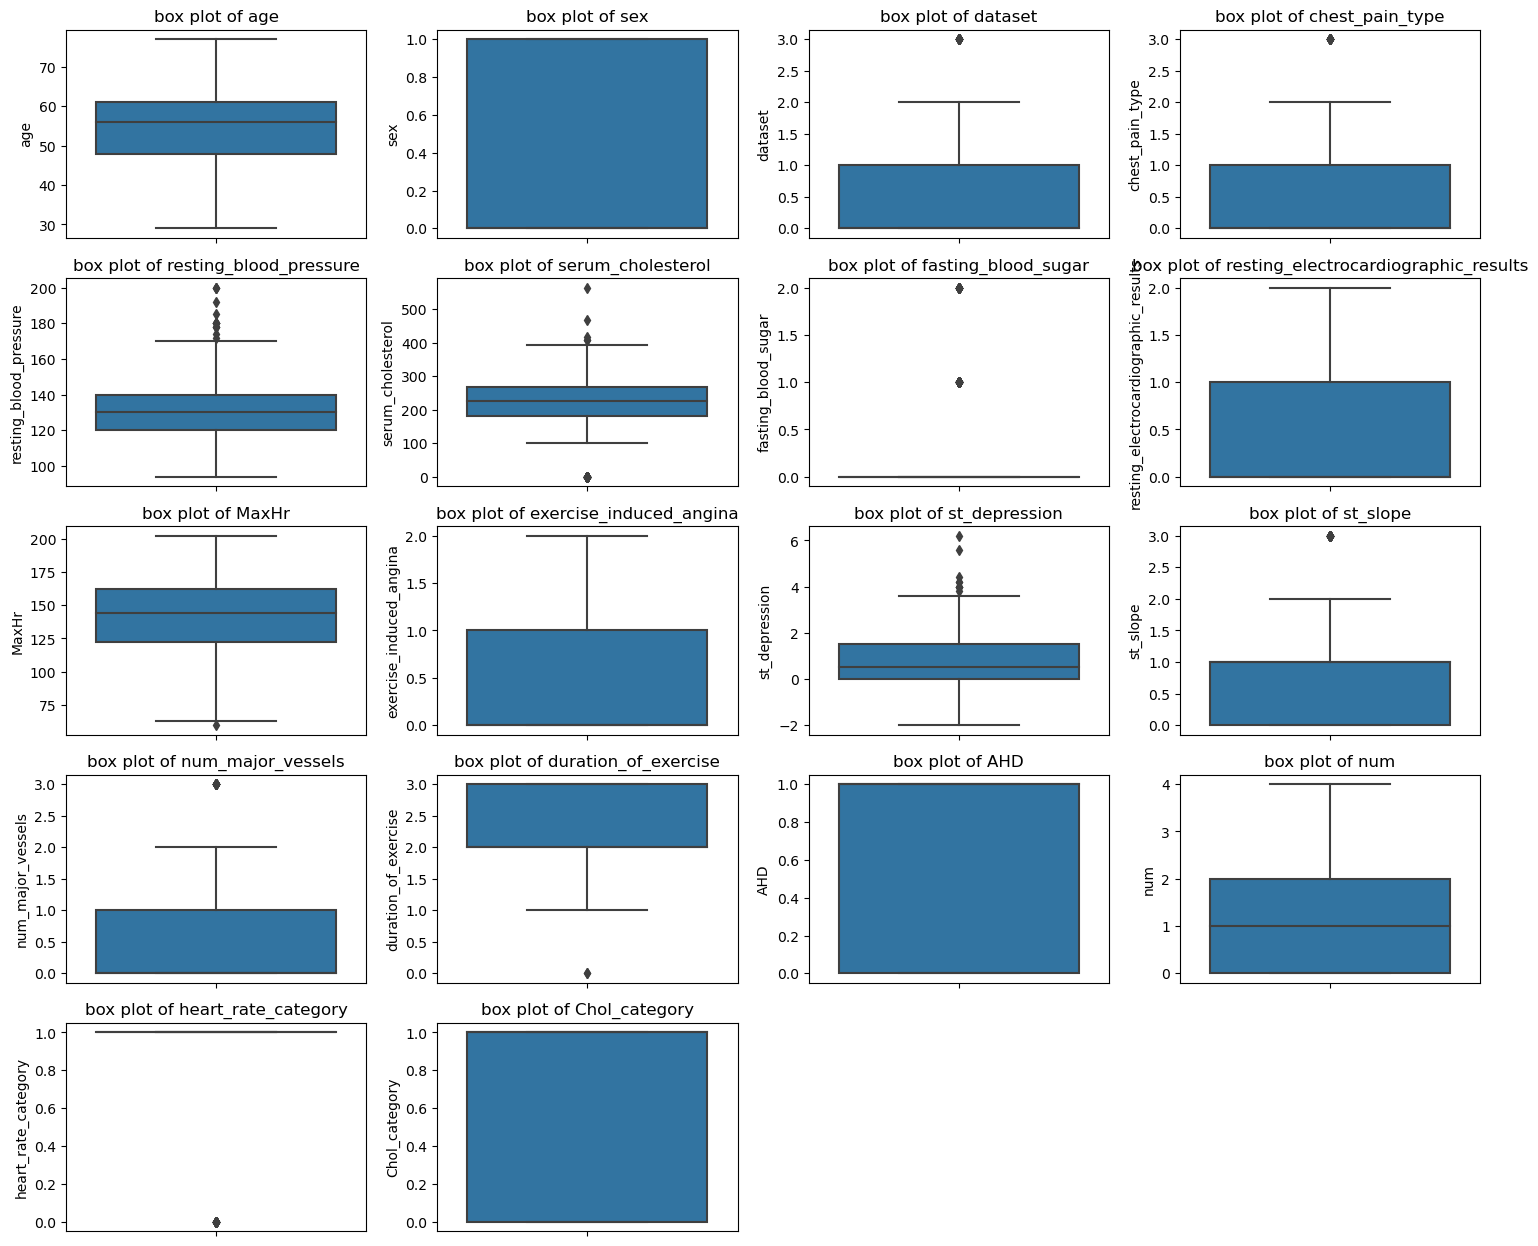

In [943]:


plt.figure(figsize=(15,15))
list=df.columns
for i in range(len(list)):
    plt.subplot(6,4,i+1)
    sns.boxplot(y=df[list[i]],data=df)
    plt.title('box plot of {}'.format(list[i]))
    plt.tight_layout()

Hence we observe that there are no outliers in the numerical data

## Univariate Analysis

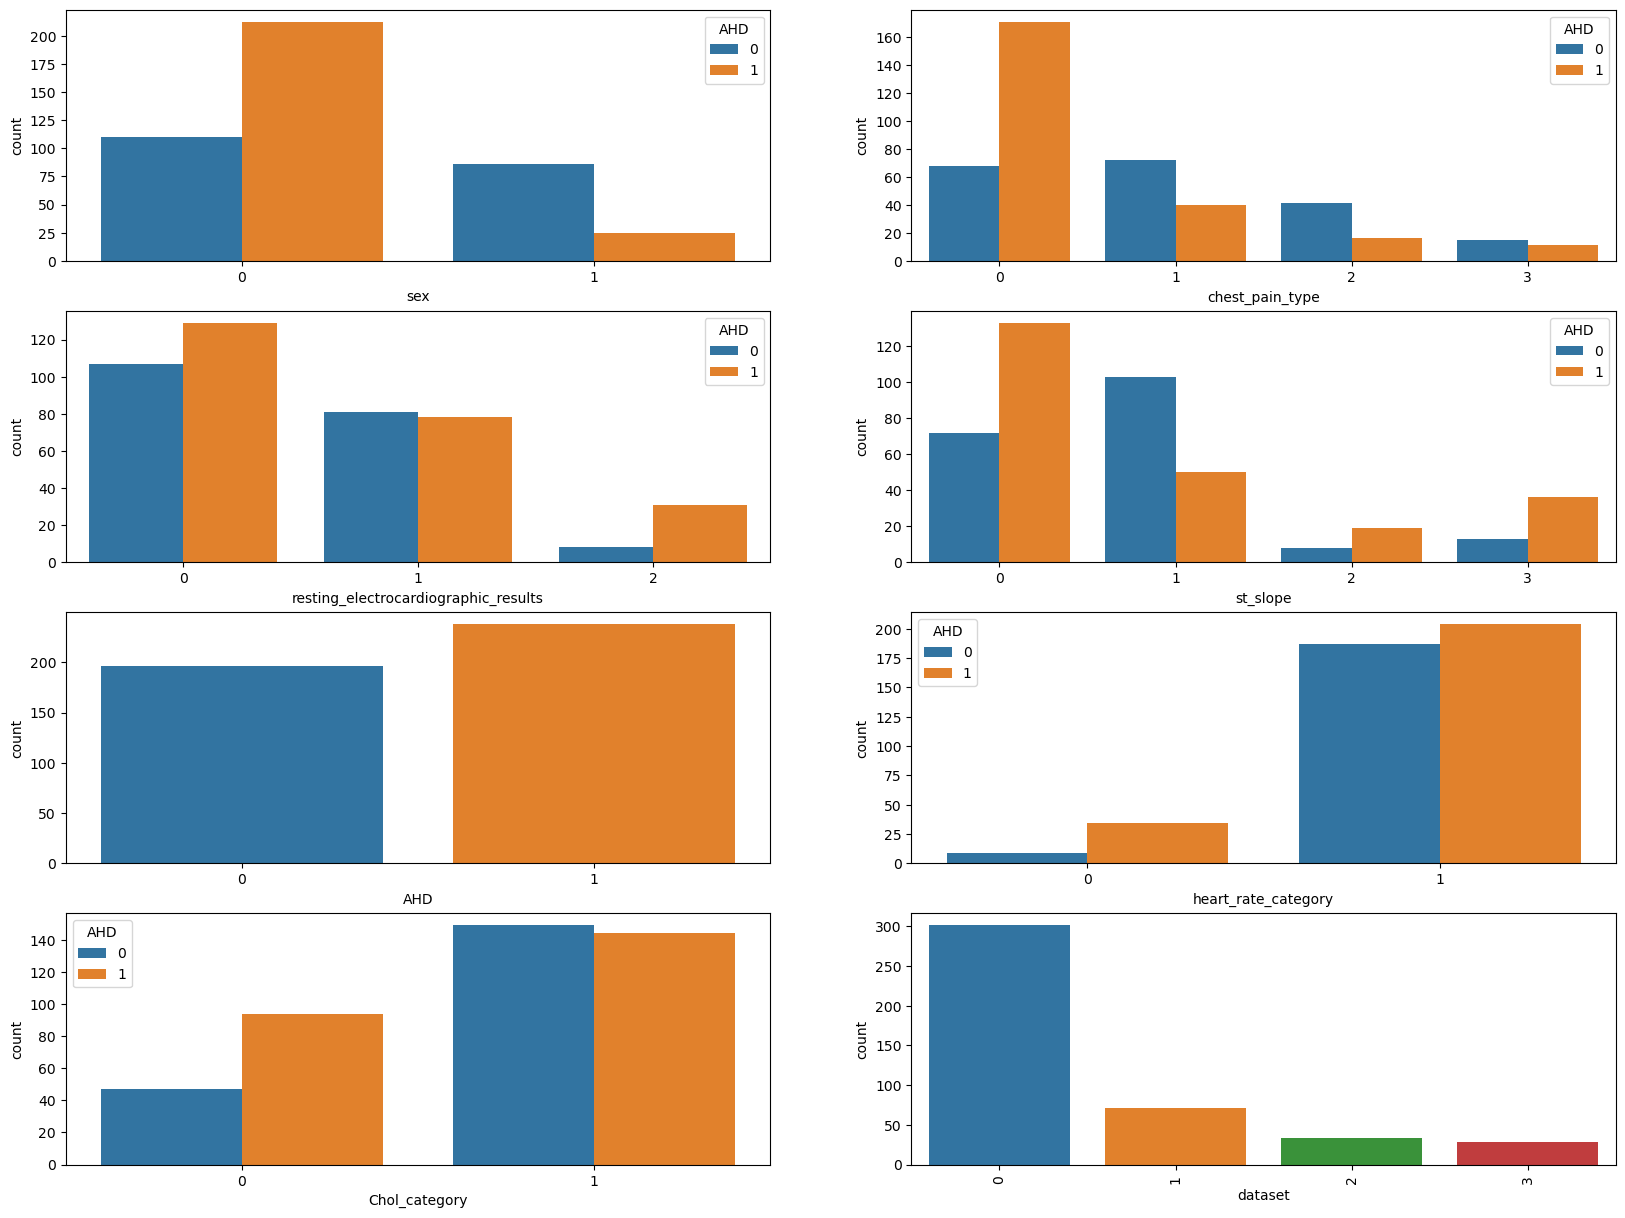

In [944]:
#univariate 
#cat vars

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,15)

sns.countplot(x='sex',data=df,hue='AHD',ax=axes[0][0])
sns.countplot(x='chest_pain_type',data=df,hue='AHD', ax=axes[0][1])
sns.countplot(x='resting_electrocardiographic_results',hue='AHD',data=df, ax=axes[1][0])
sns.countplot(x='st_slope',data=df,hue='AHD', ax=axes[1][1])
sns.countplot(x='AHD',data=df, ax=axes[2][0])
sns.countplot(x='heart_rate_category',data=df,hue='AHD', ax=axes[2][1])
sns.countplot(x='Chol_category',data=df,hue='AHD', ax=axes[3][0])
sns.countplot(x='dataset',data=df, ax=axes[3][1])

plt.xticks(rotation=90)
plt.show()


# Observations
More number of "males" are having heart diesease than females.
"asymptomatic" type of chest pain are comparatively more affected with heart diesease.
There are almost equal ratio of "normal" and "lv hypertrophy" type restecg have heart diesease.
"flat" type of slope having higher number of heart diesease.
People with higher heart rate are suspected to have heart diesease.
Same goes with cholestrol People with cholestrol are suspected to have heart diesease.
we can consider heart and cholestrol are the major impacts to the heart diesease.




<Axes: xlabel='fasting_blood_sugar', ylabel='count'>

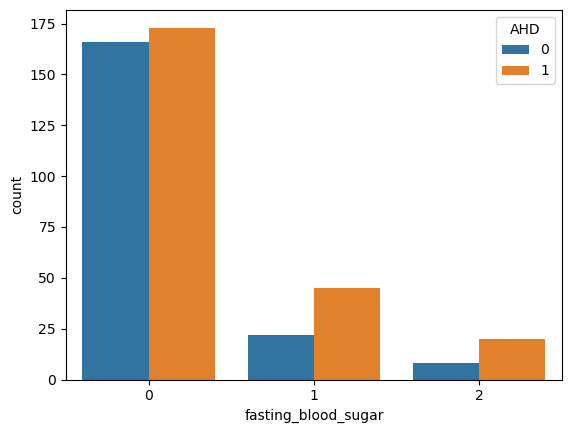

In [945]:
#univariate 
#num vars

sns.countplot(x='fasting_blood_sugar',hue='AHD',data=df)


### fasting blood sugar less than 120 suspects more AHD.

<Axes: xlabel='exercise_induced_angina', ylabel='count'>

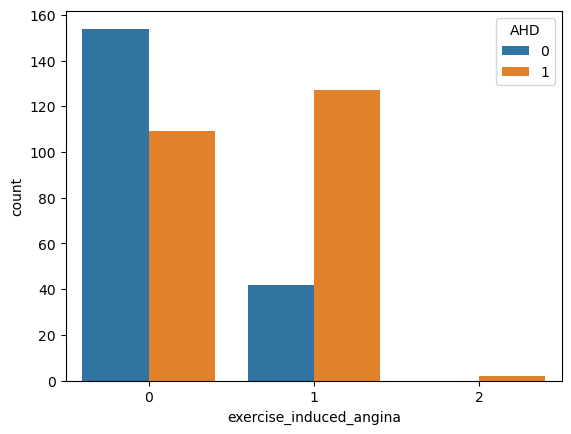

In [946]:
sns.countplot(x='exercise_induced_angina',hue='AHD',data=df)

### people with exercise induced angina tend to have heart diesease.

## Bivariate Analysis

In [947]:
#bivariate analysis
df.corr()


,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,MaxHr,exercise_induced_angina,st_depression,st_slope,num_major_vessels,duration_of_exercise,AHD,num,heart_rate_category,Chol_category
age,1.000000,0.058753,-0.065409,-0.092227,0.296168,-0.018444,0.061843,0.198721,-0.354673,0.102116,0.157477,-0.076717,0.275455,0.039318,0.131177,0.227850,-0.148000,0.017264
sex,0.058753,1.000000,-0.154344,0.105664,0.089886,0.265401,-0.095843,-0.037274,0.175112,-0.171970,-0.045998,-0.051628,0.010048,-0.049435,-0.380674,-0.249743,0.123697,0.169853
dataset,-0.065409,-0.154344,1.000000,-0.150870,0.029891,-0.285610,0.196578,0.048349,-0.311134,0.161266,-0.139728,0.403177,-0.319225,0.028334,0.273953,0.039157,-0.232928,-0.240522
chest_pain_type,-0.092227,0.105664,-0.150870,1.000000,0.030555,0.191066,-0.079589,-0.085026,0.372612,-0.375582,-0.159145,0.067405,-0.105033,-0.060098,-0.313251,-0.416346,0.170120,0.176735
resting_blood_pressure,0.296168,0.089886,0.029891,0.030555,1.000000,-0.055506,0.182943,0.160523,-0.108702,0.069559,0.125651,0.079842,0.039141,-0.004224,0.100762,0.153964,-0.046915,-0.050932
serum_cholesterol,-0.018444,0.265401,-0.285610,0.191066,-0.055506,1.000000,-0.337608,-0.023918,0.430311,-0.137226,0.177311,-0.082044,0.281887,-0.007761,-0.180973,-0.277936,0.347182,0.800565
fasting_blood_sugar,0.061843,-0.095843,0.196578,-0.079589,0.182943,-0.337608,1.000000,0.029543,-0.207654,0.007773,-0.103916,0.289568,-0.061947,-0.003543,0.140985,0.136648,-0.171472,-0.264983
resting_electrocardiographic_results,0.198721,-0.037274,0.048349,-0.085026,0.160523,-0.023918,0.029543,1.000000,-0.087528,0.046100,0.089053,0.085533,0.059950,0.052726,0.071034,0.208845,-0.076878,0.015030
MaxHr,-0.354673,0.175112,-0.311134,0.372612,-0.108702,0.430311,-0.207654,-0.087528,1.000000,-0.365576,-0.118017,0.053363,-0.001400,-0.024312,-0.332400,-0.451263,0.606911,0.351596
exercise_induced_angina,0.102116,-0.171970,0.161266,-0.375582,0.069559,-0.137226,0.007773,0.046100,-0.365576,1.000000,0.255629,-0.085710,0.026920,0.054271,0.335270,0.342643,-0.121485,-0.106446


In [948]:
df.head(5)

,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,MaxHr,exercise_induced_angina,st_depression,st_slope,num_major_vessels,duration_of_exercise,AHD,num,heart_rate_category,Chol_category
0,63,0,0,3,145.0,233.0,1,1,150.0,0,2.3,2,0.0,3,1,0,1,1
1,67,0,0,0,160.0,286.0,0,1,108.0,1,1.5,0,3.0,3,0,2,1,1
2,67,0,0,0,120.0,229.0,0,1,129.0,1,2.6,0,2.0,3,1,1,1,1
3,37,0,0,1,130.0,250.0,0,0,187.0,0,3.5,2,0.0,3,0,0,1,1
4,41,1,0,2,130.0,204.0,0,1,172.0,0,1.4,1,0.0,2,0,0,1,1


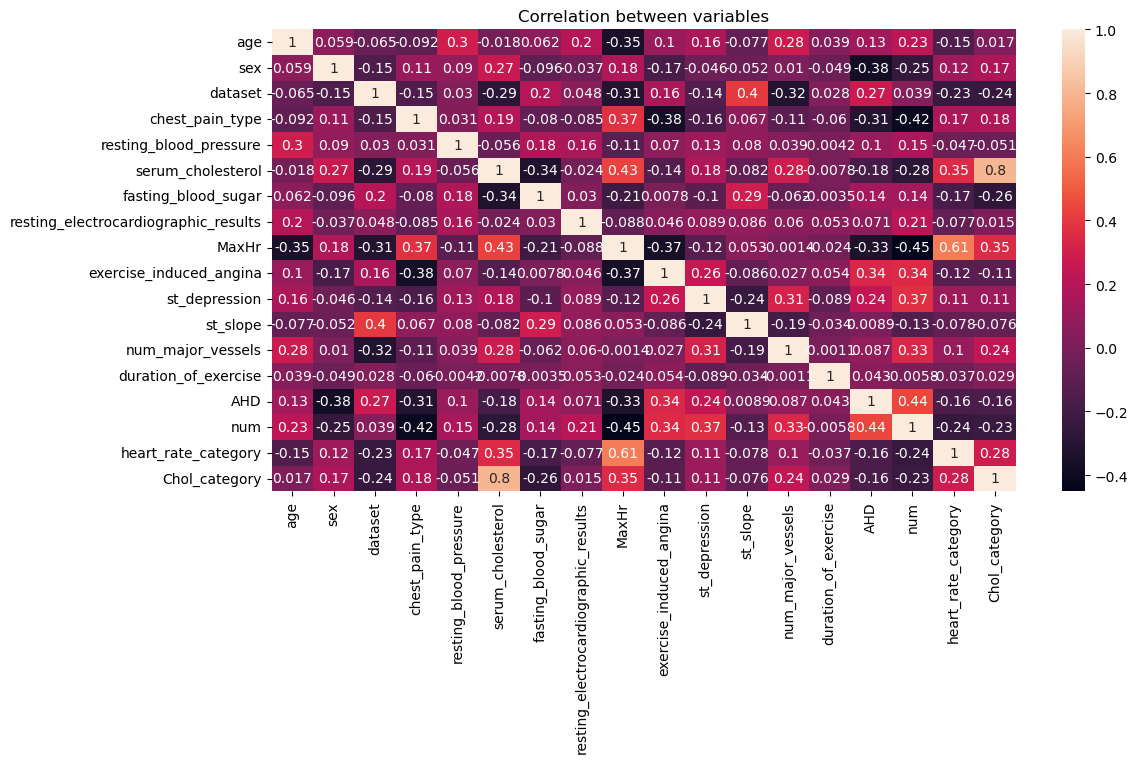

In [949]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between variables')
plt.show()

### Observation:
we can observe the same here in heatmap that chest_pain_type,MaxHr and Cholestrol are correlated.
no independent variable is too much correlated so we can keep all. we should drop any of them.


<Figure size 1500x1000 with 0 Axes>

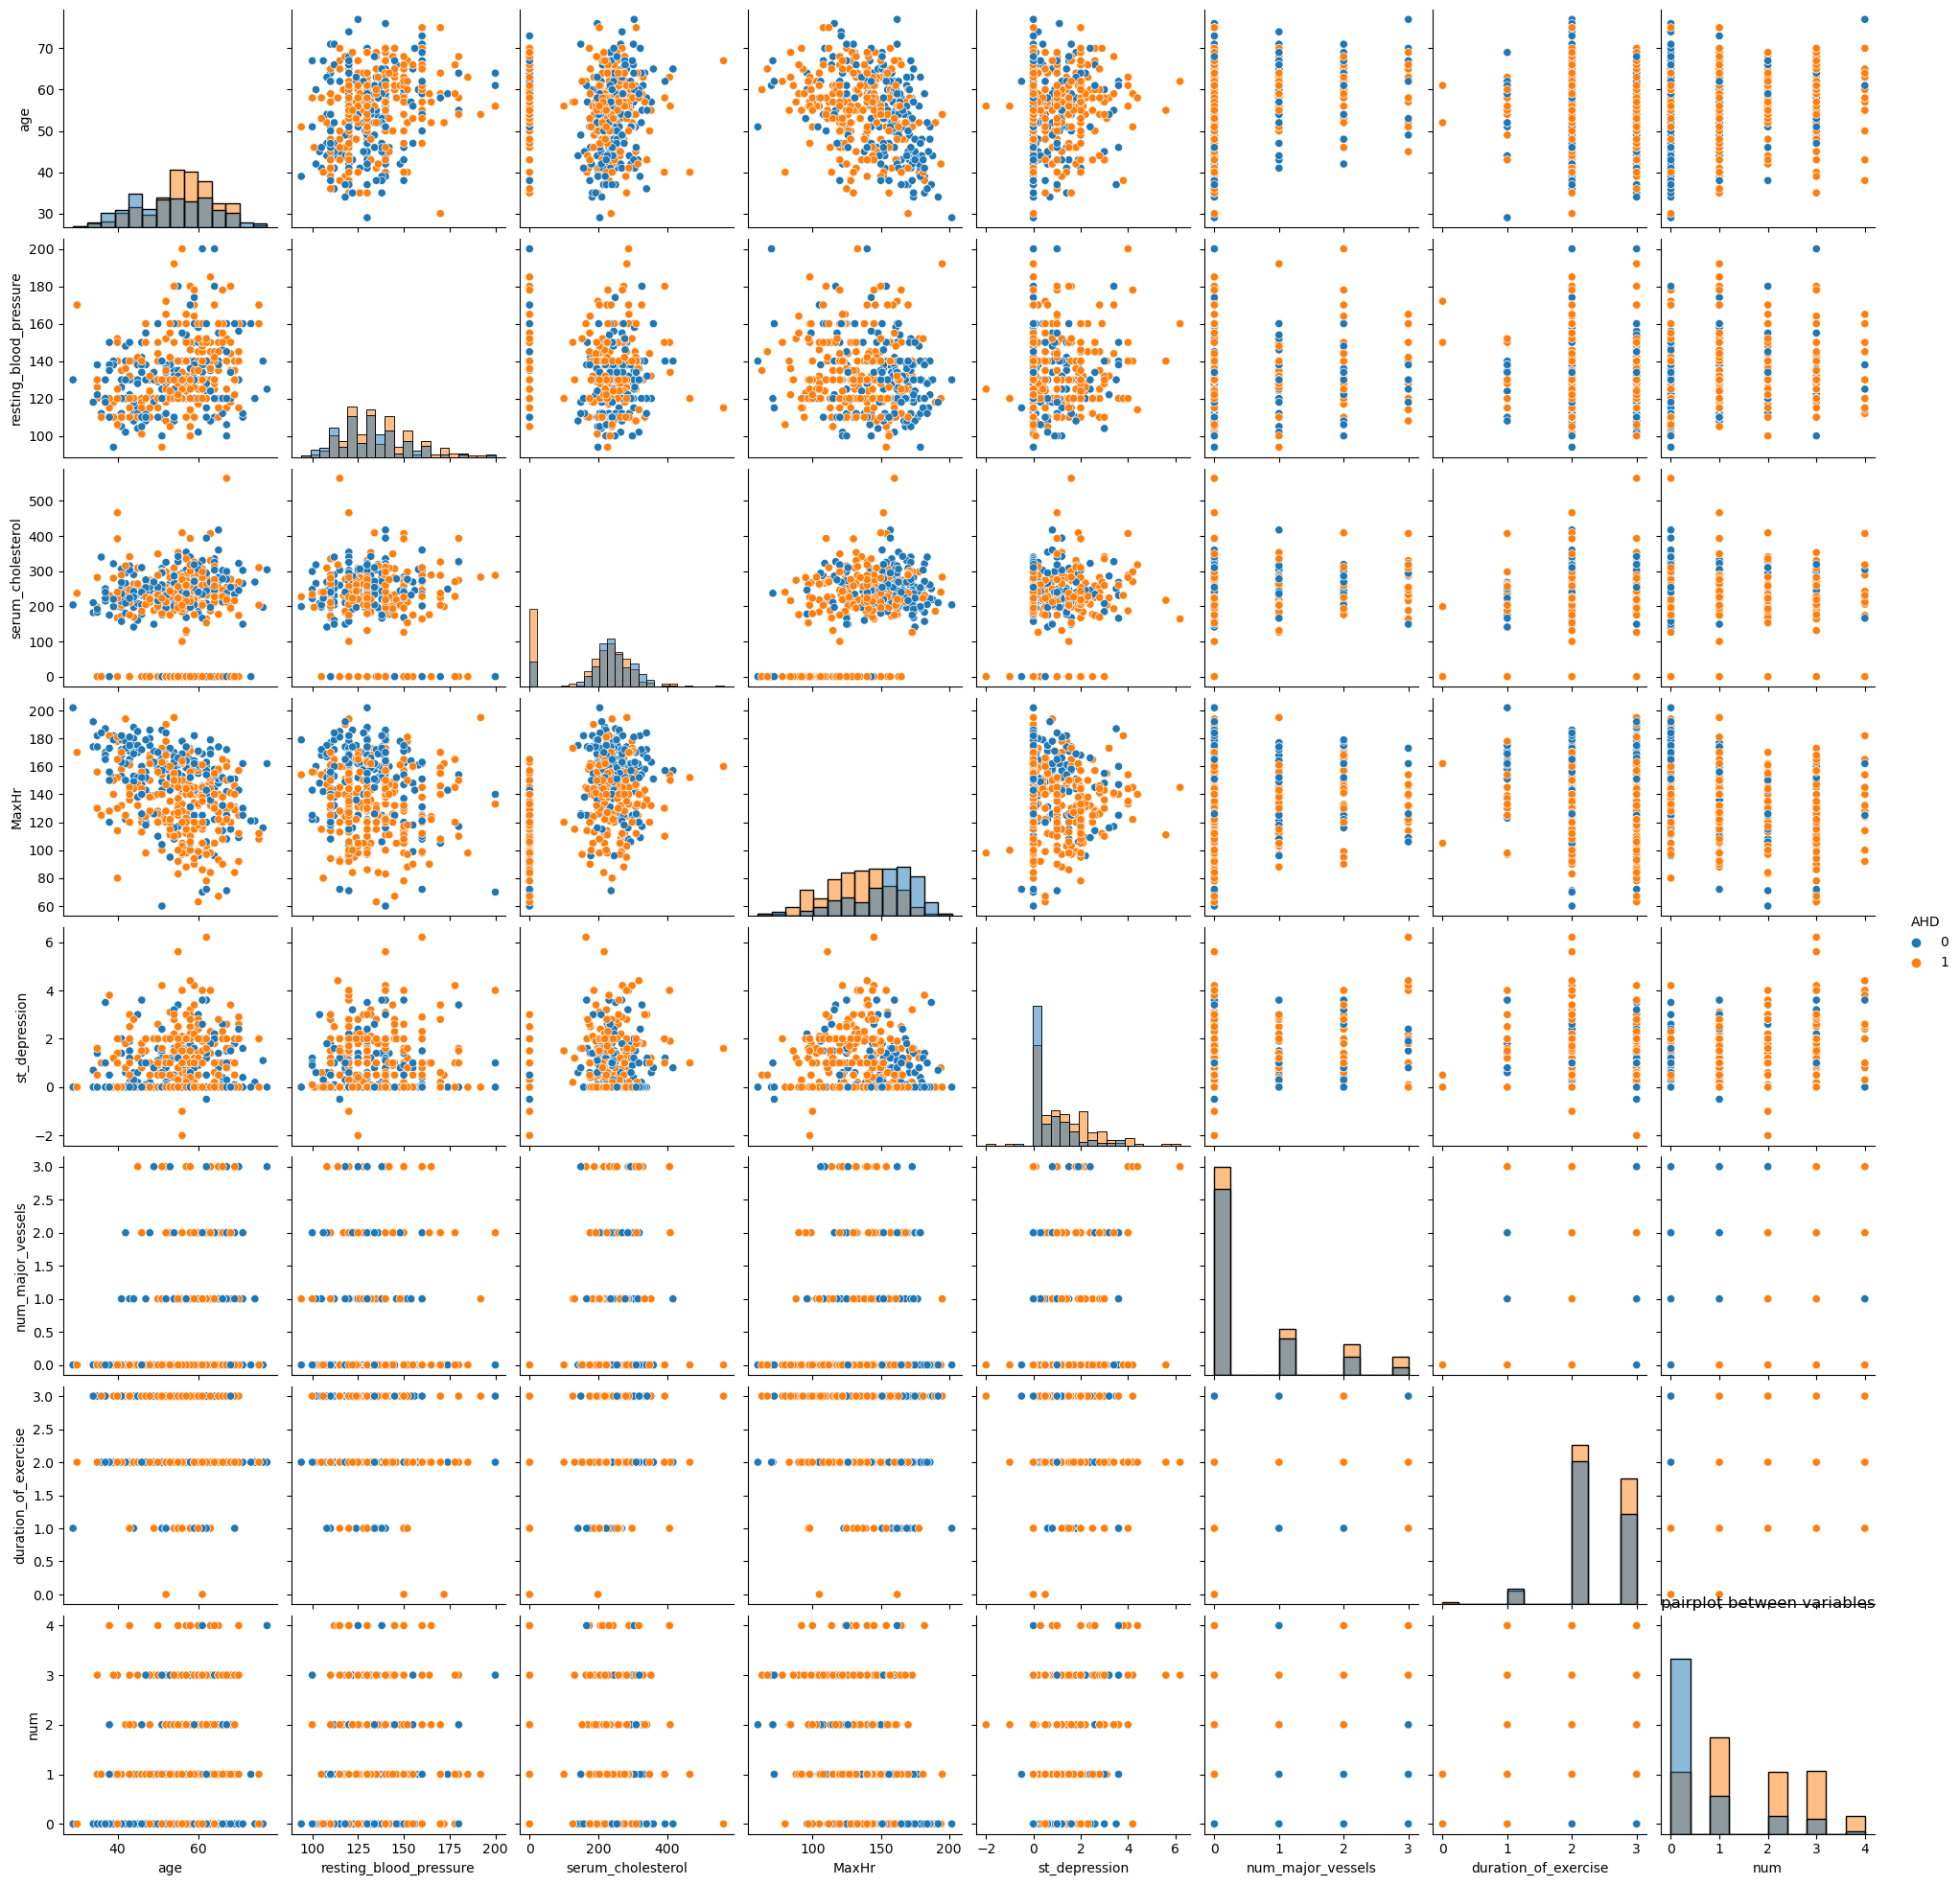

In [950]:
df1=df[['age','resting_blood_pressure','serum_cholesterol', 'MaxHr','st_depression', 'num_major_vessels', 'duration_of_exercise', 'num','AHD']]
plt.figure(figsize=(15,10))
sns.pairplot(df1 ,diag_kind='hist' ,hue='AHD');
plt.title('pairplot between variables')
plt.show()

In [951]:
#df = pd.get_dummies(df,drop_first=True)
#df.head()

In [952]:
labels = df["AHD"]
labels.value_counts()

1    238
0    196
Name: AHD, dtype: int64

## Scaling

In [953]:
feature_df_z = df.apply(zscore)  # convert all attributes to Z scale 

feature_df_z.describe()

,age,sex,dataset,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,MaxHr,exercise_induced_angina,st_depression,st_slope,num_major_vessels,duration_of_exercise,AHD,num,heart_rate_category,Chol_category
count,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02
mean,7.572028e-17,-6.548781e-17,-9.823171e-17,4.911586e-17,4.727401e-16,1.637195e-16,-3.274390e-17,-8.799924e-17,1.637195e-16,1.309756e-16,-4.911586e-17,-3.274390e-17,-6.548781e-17,8.390626e-17,1.473476e-16,4.911586e-17,-9.823171e-17,1.309756e-16
std,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00,1.001154e+00
min,-2.792552e+00,-5.862195e-01,-5.767899e-01,-7.679609e-01,-2.118565e+00,-1.865919e+00,-4.917758e-01,-8.351026e-01,-3.009006e+00,-7.989335e-01,-2.646331e+00,-8.358920e-01,-5.534503e-01,-3.912116e+00,-1.101946e+00,-9.169333e-01,-3.015464e+00,-1.441532e+00
25%,-7.138931e-01,-5.862195e-01,-5.767899e-01,-7.679609e-01,-6.990598e-01,-1.891327e-01,-4.917758e-01,-8.351026e-01,-7.098712e-01,-7.989335e-01,-8.256149e-01,-8.358920e-01,-5.534503e-01,-5.533457e-01,-1.101946e+00,-9.169333e-01,3.316239e-01,-1.441532e+00
50%,1.613318e-01,-5.862195e-01,-5.767899e-01,-7.679609e-01,-1.530962e-01,2.428373e-01,-4.917758e-01,-8.351026e-01,1.059509e-01,-7.989335e-01,-3.704360e-01,1.889021e-01,-5.534503e-01,-5.533457e-01,9.074852e-01,-9.131286e-02,3.316239e-01,6.937065e-01
75%,7.083473e-01,1.705846e+00,5.457519e-01,3.284043e-01,3.928673e-01,6.144243e-01,-4.917758e-01,6.941570e-01,7.734418e-01,1.205327e+00,5.399220e-01,1.889021e-01,6.415617e-01,1.126039e+00,9.074852e-01,7.343076e-01,3.316239e-01,6.937065e-01
max,2.458797e+00,1.705846e+00,2.790836e+00,2.521135e+00,3.668649e+00,3.373458e+00,2.978642e+00,2.223417e+00,2.256755e+00,3.209588e+00,4.818604e+00,2.238490e+00,3.031586e+00,1.126039e+00,9.074852e-01,2.385548e+00,3.316239e-01,6.937065e-01


## Train Test Split

In [954]:
X = df.drop('AHD',1)
y = df['AHD']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (434, 17) (434,)


/var/folders/4s/8p85_v_x3mq517t0mq2dmz7r0000gn/T/ipykernel_4224/2009295999.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('AHD',1)


In [955]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (303, 17) (303,)
shape of X and y respectively (test) : (131, 17) (131,)


## Logistic Regression Model

In [956]:
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)

predicted_labels = LR.predict(X_test)
score_LR=LR.score(X_test, y_test)
score_LR



Logistic Regression


0.7480916030534351

In [957]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67        54
           1       0.77      0.81      0.78        77

    accuracy                           0.74       131
   macro avg       0.73      0.73      0.73       131
weighted avg       0.74      0.74      0.74       131



In [958]:
report_dict = classification_report(y_test, Y_pred, output_dict=True)

# Access the recall and precision values for each class
recall_values = {}
precision_values = {}
for class_name, metrics in report_dict.items():
    if class_name.isdigit():  # Check if the class name is a digit (to exclude 'micro avg', 'macro avg', etc.)
        recall_values[int(class_name)] = metrics['recall']
        precision_values[int(class_name)] = metrics['precision']

# Print recall values for each class
print("Recall values for each class:")
for class_name, recall in recall_values.items():
    print(f"Class {class_name}: {recall}")

Recall values for each class:
Class 0: 0.6481481481481481
Class 1: 0.8051948051948052


In [959]:
LR_recall=recall_values[1]
LR_recall

0.8051948051948052

In [960]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, Y_pred))

[[35 19]
 [15 62]]


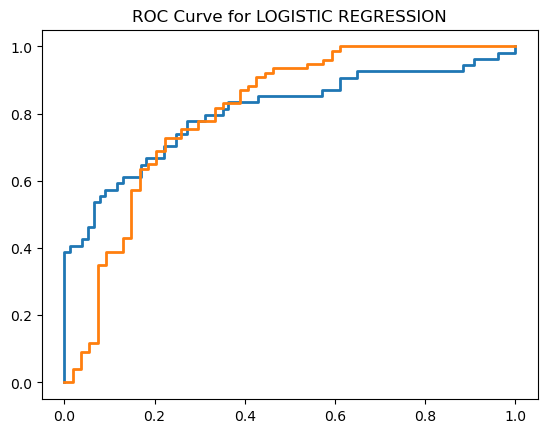

In [962]:
#ROC Curve
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute predicted probabilities
y_score = LR.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(LR.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
plt.title('ROC Curve for LOGISTIC REGRESSION')
lw = 2
for i in range(len(LR.classes_)):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

## Decision Tree Model

In [963]:
print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5) 
decision_tree.fit(X_train, y_train)  

predicted_labels = decision_tree.predict(X_test)
score_DT=decision_tree.score(X_test, y_test)
score_DT



DecisionTreeClassifier


0.7480916030534351

In [964]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67        54
           1       0.77      0.81      0.78        77

    accuracy                           0.74       131
   macro avg       0.73      0.73      0.73       131
weighted avg       0.74      0.74      0.74       131



In [965]:
report_dict = classification_report(y_test, Y_pred, output_dict=True)

# Access the recall and precision values for each class
recall_values = {}
precision_values = {}
for class_name, metrics in report_dict.items():
    if class_name.isdigit():  # Check if the class name is a digit (to exclude 'micro avg', 'macro avg', etc.)
        recall_values[int(class_name)] = metrics['recall']
        precision_values[int(class_name)] = metrics['precision']

# Print recall values for each class
print("Recall values for each class:")
for class_name, recall in recall_values.items():
    print(f"Class {class_name}: {recall}")

Recall values for each class:
Class 0: 0.6481481481481481
Class 1: 0.8051948051948052


In [966]:
DTC_recall=recall_values[1]
DTC_recall

0.8051948051948052

In [967]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, Y_pred))

[[35 19]
 [15 62]]


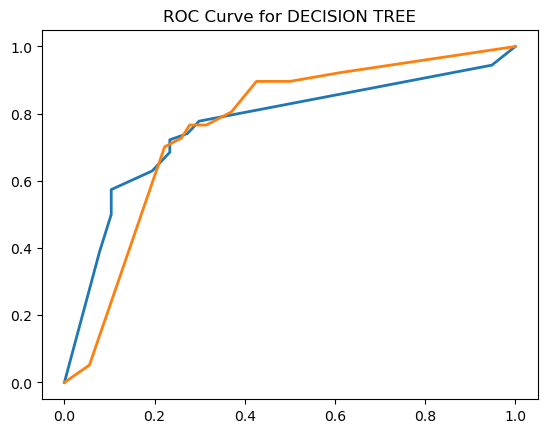

In [968]:
#ROC Curve
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute predicted probabilities
y_score = decision_tree.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(decision_tree.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
plt.title('ROC Curve for DECISION TREE')
lw = 2
for i in range(len(decision_tree.classes_)):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

## Randon Forest Classifier

In [969]:
print('RandomForestClassifier') #top most imp variables to least imp var
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
RFC.fit(X_train, y_train)

predicted_labels = RFC.predict(X_test)
score_RFC=RFC.score(X_test, y_test)
score_RFC




RandomForestClassifier


0.7633587786259542

In [970]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67        54
           1       0.77      0.81      0.78        77

    accuracy                           0.74       131
   macro avg       0.73      0.73      0.73       131
weighted avg       0.74      0.74      0.74       131



In [971]:
report_dict = classification_report(y_test, Y_pred, output_dict=True)

# Access the recall and precision values for each class
recall_values = {}
precision_values = {}
for class_name, metrics in report_dict.items():
    if class_name.isdigit():  # Check if the class name is a digit (to exclude 'micro avg', 'macro avg', etc.)
        recall_values[int(class_name)] = metrics['recall']
        precision_values[int(class_name)] = metrics['precision']

# Print recall values for each class
print("Recall values for each class:")
for class_name, recall in recall_values.items():
    print(f"Class {class_name}: {recall}")

Recall values for each class:
Class 0: 0.6481481481481481
Class 1: 0.8051948051948052


In [972]:
RFC_recall=recall_values[1]
RFC_recall

0.8051948051948052

In [973]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, Y_pred))

[[35 19]
 [15 62]]


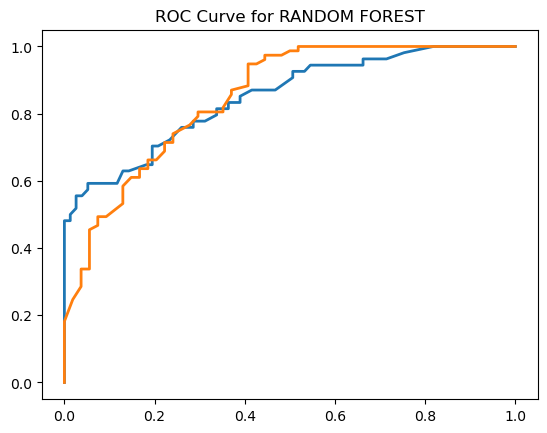

In [974]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute predicted probabilities
y_score = RFC.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(RFC.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
plt.title('ROC Curve for RANDOM FOREST')
lw = 2
for i in range(len(RFC.classes_)):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

## K Nearest Neighbour Model

In [975]:
X = np.array(feature_df_z)
X.shape

(434, 18)

In [976]:
# store the bc_labels data into a separate np array

y = np.array(labels)
y.shape

(434,)

In [977]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [978]:
NNH = KNeighborsClassifier(n_neighbors= 5, weights = 'distance' )
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)


KNeighborsClassifier(weights='distance')

In [979]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
score_NNH=NNH.score(X_test, y_test)
score_NNH

0.916030534351145

In [980]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))




              precision    recall  f1-score   support

           0       0.54      0.43      0.48        63
           1       0.56      0.66      0.60        68

    accuracy                           0.55       131
   macro avg       0.55      0.55      0.54       131
weighted avg       0.55      0.55      0.54       131



In [981]:
report_dict = classification_report(y_test, Y_pred, output_dict=True)

# Access the recall and precision values for each class
recall_values = {}
precision_values = {}
for class_name, metrics in report_dict.items():
    if class_name.isdigit():  # Check if the class name is a digit (to exclude 'micro avg', 'macro avg', etc.)
        recall_values[int(class_name)] = metrics['recall']
        precision_values[int(class_name)] = metrics['precision']

# Print recall values for each class
print("Recall values for each class:")
for class_name, recall in recall_values.items():
    print(f"Class {class_name}: {recall}")

Recall values for each class:
Class 0: 0.42857142857142855
Class 1: 0.6617647058823529


In [982]:
KNN_recall=recall_values[1]
KNN_recall

0.6617647058823529

In [983]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[54  9]
 [ 2 66]]


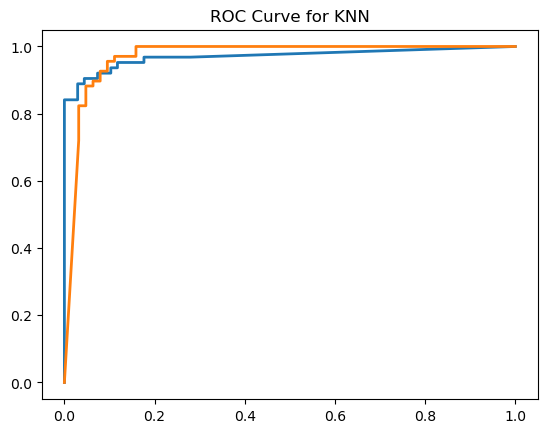

In [984]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute predicted probabilities
y_score = NNH.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(NNH.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
plt.title('ROC Curve for KNN')
lw = 2
for i in range(len(NNH.classes_)):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

## Comparison of all the model's scores and recall values

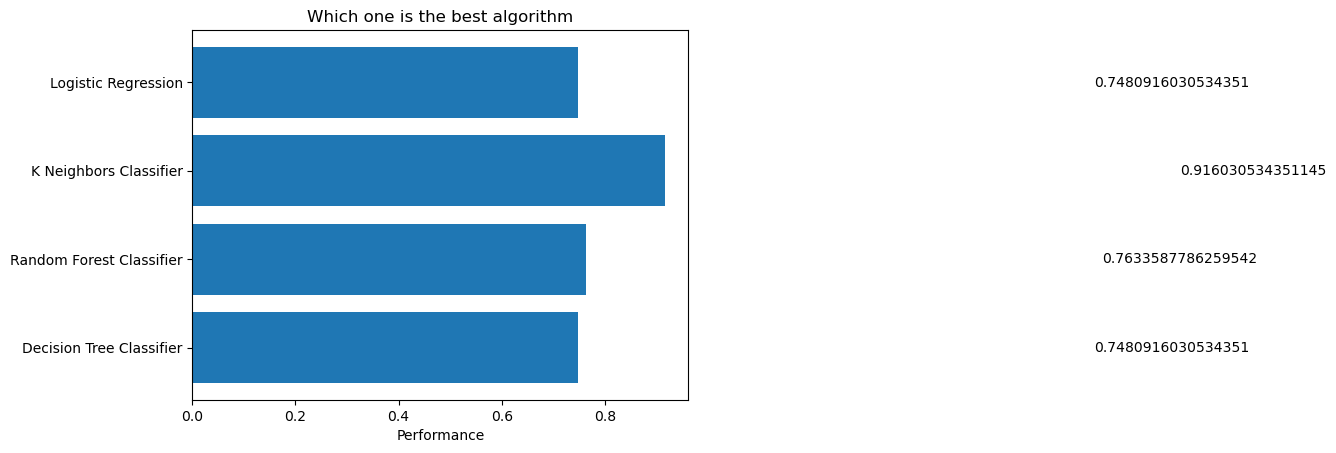

In [985]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier')
y_pos = np.arange(len(algorithms))
x = (score_LR, score_NNH, score_RFC, score_DT) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [986]:
results=pd.DataFrame(columns=['score'])
results.loc['Logistic Regression']=[score_logreg]
results.loc['Decision Tree Classifier']=[score_dtc]
results.loc['Random Forest Classifier']=[score_rfc]
results.loc['K-Neighbors Classifier']=[score_knc]


In [987]:
results.sort_values('score',ascending=False)

,score
K-Neighbors Classifier,0.916031
Logistic Regression,0.748092
Decision Tree Classifier,0.740458
Random Forest Classifier,0.740458


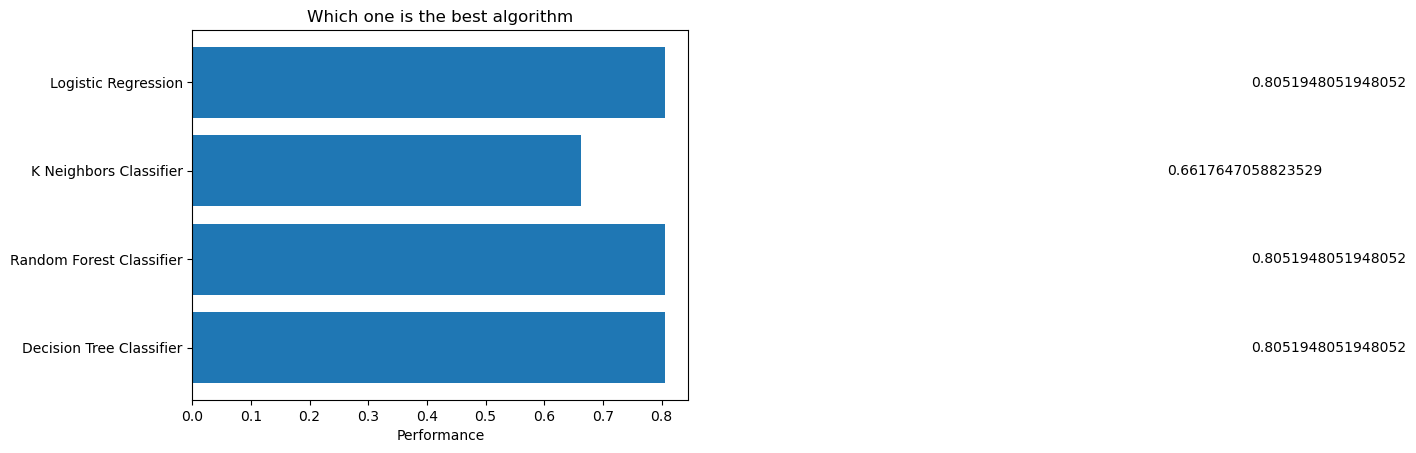

In [988]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier')
y_pos = np.arange(len(algorithms))
x = (LR_recall, KNN_recall, RFC_recall, DTC_recall) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [989]:
a=pd.DataFrame(columns=['Recall'])
a.loc['Logistic Regression']=[LR_recall]
a.loc['Decision Tree Classifier']=[DTC_recall]
a.loc['Random Forest Classifier']=[RFC_recall]
a.loc['K-Neighbors Classifier']=[KNN_recall]

In [990]:
a.sort_values('Recall',ascending=False)

,Recall
Logistic Regression,0.805195
Decision Tree Classifier,0.805195
Random Forest Classifier,0.805195
K-Neighbors Classifier,0.661765


###
In the context of a heart prediction model, the recall metric is crucial, especially when dealing with imbalanced datasets or when certain classes (such as the presence of heart disease) are more important than others. 
Recall measures the ability of a model to correctly identify all relevant instances of a class, which is particularly important in scenarios where missing positive cases (e.g., failing to identify individuals with heart disease) could have serious consequences.
In a heart diesease prediction model, we typically aim for high recall, as it's important to identify as many individuals with heart disease as possible, even if it means accepting some false positives (healthy individuals being incorrectly classified as having heart disease). 
Missing individuals with heart disease (false negatives) can have severe consequences, so minimizing false negatives is often a priority.
Therefore, a high recall score is desirable in a heart prediction model.